In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../'))
from src.lib import centroids as centutils
plt.rcParams['figure.figsize'] = [15, 15]

In [2]:
nuclei_path = '../data/ACTB_B2_CAn.tif'
jbin_path = '../data/ACTB_B2_CAj-BI.tif'
jsk_path = '../data/ACTB_B2_CAj-SK.tif'
j_path = '../data/ACTB_B2_CAj.tif'

nuclei_img = cv2.imread(nuclei_path)
jbin_img = cv2.imread(jbin_path)
jsk_img = cv2.imread(jsk_path)
j_img = cv2.imread(j_path)

centroids = centutils.get_nuclei_centroids(nuclei_img)
centroids = centutils.clean_centroids(centroids, jbin_img)
centroids, moments = centutils.get_moments_cells(centroids, jbin_img)

########## Iteration 1 ########## 
N centroids: 118
N centroids after removing centroids in white space: 111
N centroids after removing close points: 111
N centroids after Delaunay analysis: 103
########## Iteration 2 ########## 
N centroids: 103
N centroids after removing centroids in white space: 103
N centroids after removing close points: 103
N centroids after Delaunay analysis: 103
########## Iteration 3 ########## 
N centroids: 103
N centroids after removing centroids in white space: 103
N centroids after removing close points: 103
N centroids after Delaunay analysis: 103


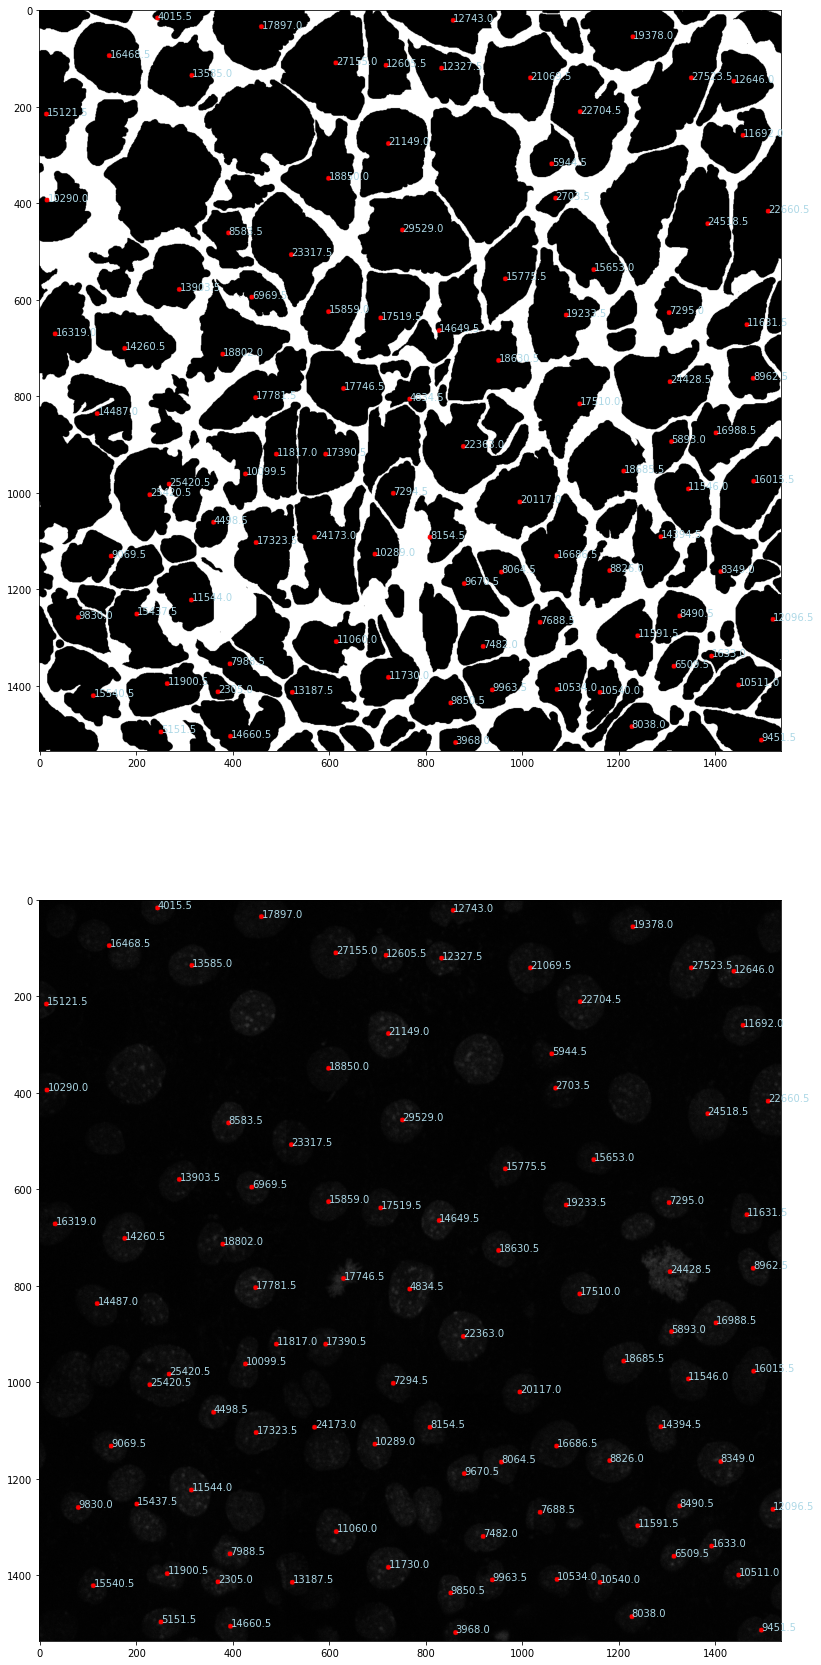

In [5]:
bin_centroid_final = centutils.draw_centroids(centroids, jbin_img)
nuclei_centroid_final = centutils.draw_centroids(centroids, nuclei_img)

fig, ax = plt.subplots(2, figsize=(15, 30))
ax[0].imshow(bin_centroid_final)
ax[1].imshow(nuclei_centroid_final)

for centroid, moment in zip(centroids, moments):
    area = moment['m00']
    ax[0].text(centroid[0], centroid[1], str(area), color='lightblue')
    ax[1].text(centroid[0], centroid[1], str(area), color='lightblue')